<h4><font color = red>Question 1: Occupations</font></h4>

In [38]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

# Mean age per occupation
mean_age_per_occupation = users.groupby("occupation")["age"].mean()
print("\nMean age per occupation:\n", mean_age_per_occupation)

# Male ratio per occupation (sorted from most to least)
users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio_per_occupation = users.groupby("occupation")["is_male"].mean().sort_values(ascending=False)
print("\nMale ratio per occupation (sorted):\n", male_ratio_per_occupation)

# Minimum and maximum ages per occupation
min_max_age_per_occupation = users.groupby("occupation")["age"].agg(['min', 'max'])
print("\nMinimum and maximum ages per occupation:\n", min_max_age_per_occupation)

# Mean age per occupation and gender combination
mean_age_per_occupation_gender = users.groupby(["occupation", "gender"])["age"].mean()
print("\nMean age per occupation and gender:\n", mean_age_per_occupation_gender)

# Percentage of women and men per occupation
gender_counts = users.groupby(["occupation", "gender"]).size().unstack(fill_value=0)
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
print("\nPercentage of women and men per occupation:\n", gender_percentages)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other   

<h4><font color = red>Question 2: Euro Teams</font></h4>

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

goal_column = euro12["Goals"]
print("\nGoal column:\n", goal_column)

#How many teams participated in Euro 2012
num_teams = euro12["Team"].nunique()
print("\nNumber of teams that participated in Euro 2012:", num_teams)

# Number of columns in the dataset
num_columns = euro12.shape[1]
print("\nNumber of columns in the dataset:", num_columns)

# View only the columns Team, Yellow Cards, and Red Cards, assign to discipline
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
print("\nDiscipline dataframe:\n", discipline)

# Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=["Red Cards", "Yellow Cards"], ascending=[True, True])
print("\nTeams sorted by Red Cards and Yellow Cards:\n", discipline_sorted)

# Calculate the mean Yellow Cards given per team
mean_yellow_cards = discipline["Yellow Cards"].mean()
print("\nMean Yellow Cards given per team:", mean_yellow_cards)

# Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12["Goals"] > 6]
print("\nTeams that scored more than 6 goals:\n", teams_more_than_6_goals)

# Select the teams that start with 'G'
teams_start_with_g = euro12[euro12["Team"].str.startswith('G')]
print("\nTeams that start with 'G':\n", teams_start_with_g)

# Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:\n", first_7_columns)

# Select all columns except the last 3
all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:\n", all_except_last_3)

# Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_selected_teams = euro12[euro12["Team"].isin(["England", "Italy", "Russia"])][["Team", "Shooting Accuracy"]]
print("\nShooting Accuracy for England, Italy, and Russia:\n", shooting_accuracy_selected_teams)



Goal column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams that participated in Euro 2012: 16

Number of columns in the dataset: 35

Discipline dataframe:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13             

<h4><font color = red>Question 3: Housing</font></h4>

In [8]:
import pandas as pd
import numpy as np

# Create 3 different Series of length 100
np.random.seed(42)  # For reproducibility
series1 = pd.Series(np.random.randint(1, 5, size=100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, size=100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10,000 to 30,000

# Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Change the name of the columns
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]

print("\nDataFrame with renamed columns:\n", df.head())

# Create a DataFrame by joining 3 Series by column
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=["bigcolumn"])

print("\nOne-column DataFrame:\n", bigcolumn_df.head(120))  # Display more rows for clarity

# Check if it only goes until index 99
print("\nDoes the one-column DataFrame stop at index 99? ", bigcolumn_df.index[-1] == 99)

# Reindex the DataFrame so it goes from 0 to 299
bigcolumn_df_reindexed = bigcolumn_df.reindex(range(300))
print("\nReindexed DataFrame:\n", bigcolumn_df_reindexed.tail())  # Display the last rows to confirm



DataFrame with renamed columns:
    bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047

One-column DataFrame:
      bigcolumn
0            3
1            4
2            1
3            3
4            3
..         ...
115          2
116          3
117          1
118          2
119          1

[120 rows x 1 columns]

Does the one-column DataFrame stop at index 99?  False

Reindexed DataFrame:
      bigcolumn
295      11154
296      14499
297      16295
298      22183
299      22874


<h4><font color = red>Question 4: Wind Statistics</font></h4>

In [10]:
import pandas as pd
import numpy as np

file_path = "C:\\Users\\harin\\Downloads\\wind.txt"  # Replace with path to your local wind.txt file
data = pd.read_csv(file_path, delim_whitespace=True)

# Replace the first 3 columns with a proper datetime index
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
data.set_index('Date', inplace=True)

# Correct the year 2061
def fix_year(date):
    if date.year > 2000:
        return date.replace(year=date.year - 100)
    return date

data.index = data.index.map(fix_year)

# Ensure the index is of type datetime64[ns]
data.index = pd.to_datetime(data.index)

# Compute missing values for each location
missing_values_per_location = data.isna().sum()
print("\nMissing values per location:\n", missing_values_per_location)

# Compute total non-missing values
total_non_missing = data.notna().sum().sum()
print("\nTotal non-missing values:", total_non_missing)

# Calculate the mean windspeeds over all locations and times
overall_mean_windspeed = data.mean().mean()
print("\nOverall mean windspeed:", overall_mean_windspeed)

# Calculate min, max, mean windspeed and standard deviations for each location
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print("\nStatistics per location:\n", loc_stats)

# Calculate min, max, mean windspeed and standard deviations for each day
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
print("\nStatistics per day:\n", day_stats.head())

# Average windspeed in January for each location
january_data = data[data.index.month == 1]
january_mean = january_data.groupby(january_data.index.year).mean()
print("\nAverage windspeed in January:\n", january_mean.mean())

# Downsample to a yearly frequency
yearly_data = data.resample('Y').mean()
print("\nYearly frequency data:\n", yearly_data.head())

# Downsample to a monthly frequency
monthly_data = data.resample('M').mean()
print("\nMonthly frequency data:\n", monthly_data.head())

# Downsample to a weekly frequency
weekly_data = data.resample('W').mean()
print("\nWeekly frequency data:\n", weekly_data.head())

# Calculate weekly min, max, mean, standard deviation for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[1:53]
print("\nWeekly statistics for the first 52 weeks:\n", weekly_stats)


C:\Users\harin\AppData\Local\Temp\ipykernel_16356\3251627135.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)



Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Overall mean windspeed: 10.227982360836938

Statistics per location:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Statistics per day:
              min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
196

C:\Users\harin\AppData\Local\Temp\ipykernel_16356\3251627135.py:49: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').mean()
C:\Users\harin\AppData\Local\Temp\ipykernel_16356\3251627135.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3

<h4><font color = red>Question 5:</font></h4>

In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

# First 10 entries
print("\nFirst 10 entries:\n", chipo.head(10))

# Number of observations in the dataset
num_observations = chipo.shape[0]
print("\nNumber of observations:", num_observations)

# Number of columns in the dataset
num_columns = chipo.shape[1]
print("\nNumber of columns:", num_columns)

# Print the name of all the columns
print("\nColumn names:", chipo.columns.tolist())

# How is the dataset indexed?
print("\nDataset index:", chipo.index)

# Most-ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("\nMost-ordered item:", most_ordered_item)

# How many of the most-ordered item were ordered?
most_ordered_item_quantity = chipo.groupby('item_name')['quantity'].sum().max()
print("\nQuantity of the most-ordered item:", most_ordered_item_quantity)

# Most ordered item in the choice_description column
most_ordered_choice_description = chipo.groupby('choice_description')['quantity'].sum().idxmax()
print("\nMost ordered choice description:", most_ordered_choice_description)

# Total items ordered
total_items_ordered = chipo['quantity'].sum()
print("\nTotal items ordered:", total_items_ordered)

# Convert item price to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print("\nItem price type after conversion:", chipo['item_price'].dtype)

# Revenue for the period
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nTotal revenue:", total_revenue)

# Number of orders made in the period
total_orders = chipo['order_id'].nunique()
print("\nTotal orders made:", total_orders)

# Average revenue per order
average_revenue_per_order = total_revenue / total_orders
print("\nAverage revenue per order:", average_revenue_per_order)

# Number of different items sold
unique_items_sold = chipo['item_name'].nunique()
print("\nNumber of different items sold:", unique_items_sold)



First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3          

<h4><font color = red>Question 6:</font></h4>

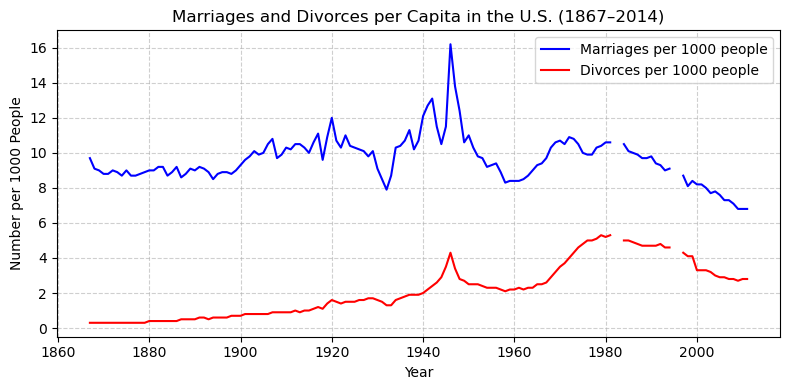

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:\\Users\\harin\\Downloads\\us-marriages-divorces-1867-2014.csv' 
data = pd.read_csv(file_path)

years = data['Year']
marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']

# Line plot
plt.figure(figsize=(8, 4))
plt.plot(years, marriages_per_capita, label='Marriages per 1000 people', color='blue')
plt.plot(years, divorces_per_capita, label='Divorces per 1000 people', color='red')

# Label axes
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number per 1000 People', fontsize=10)
plt.title('Marriages and Divorces per Capita in the U.S. (1867–2014)', fontsize=12)

plt.legend()

# Display the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h4><font color = red>Question 7:</font></h4>

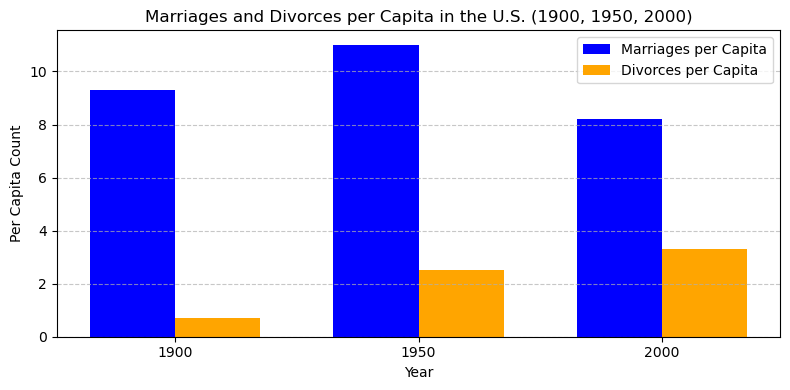

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = 'C:\\Users\\harin\\Downloads\\us-marriages-divorces-1867-2014.csv' 
data = pd.read_csv(file_path)

years = [1900, 1950, 2000]
marriages_per_capita = [9.3, 11.0, 8.2]  
divorces_per_capita = [0.7, 2.5, 3.3]    

# Bar width and positions
bar_width = 0.35
x = np.arange(len(years))  

# Creating bar chart
plt.figure(figsize=(8, 4))
plt.bar(x - bar_width / 2, marriages_per_capita, width=bar_width, label='Marriages per Capita', color='blue')
plt.bar(x + bar_width / 2, divorces_per_capita, width=bar_width, label='Divorces per Capita', color='orange')

# Adding labels and customizations
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Per Capita Count', fontsize=10)
plt.xticks(x, years) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


<h4><font color = red>Question 8:</font></h4>

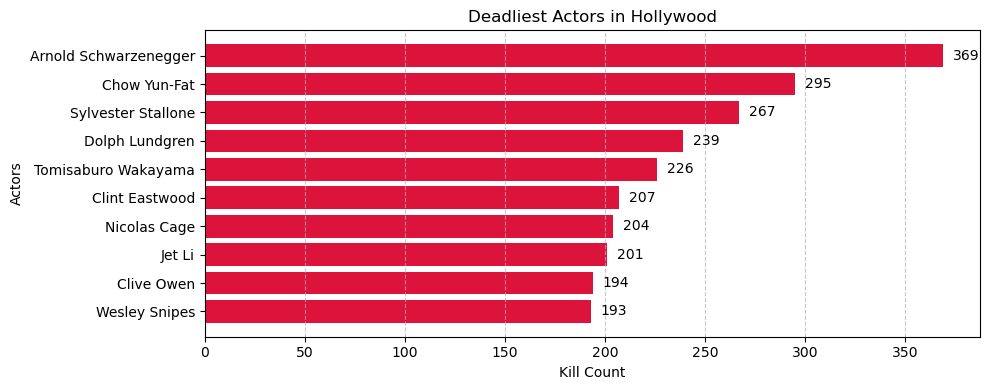

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:\\Users\\harin\\Downloads\\actor_kill_counts.csv'  
data = pd.read_csv(file_path)

# Sort the data by the "Kill Count" column 
data_sorted = data.sort_values(by="Count", ascending=False)

actors = data_sorted["Actor"]
kill_counts = data_sorted["Count"]

# Create the horizontal bar chart
plt.figure(figsize=(10, 4))
plt.barh(actors, kill_counts, color='crimson')

# Add labels, title, and grid
plt.xlabel('Kill Count', fontsize=10)
plt.ylabel('Actors', fontsize=10)
plt.title('Deadliest Actors in Hollywood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, count in enumerate(kill_counts):
    plt.text(count + 5, i, str(count), va='center', fontsize=10)

plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


<h4><font color = red>Question 9:</font></h4>

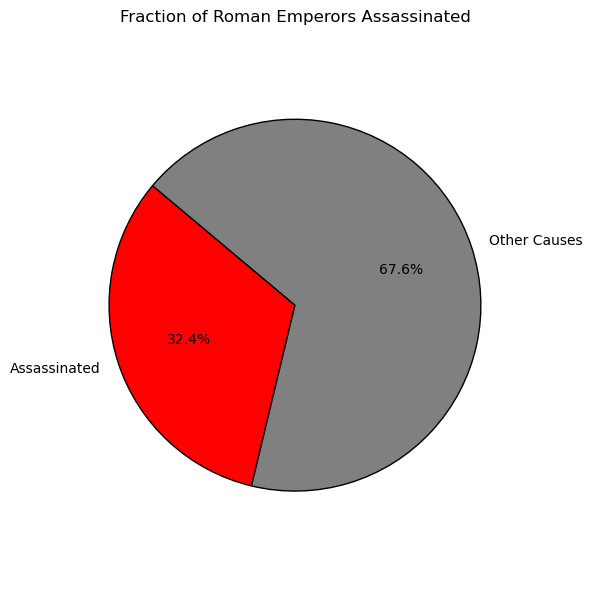

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:\\Users\\harin\\Downloads\\roman-emperor-reigns.csv'  
data = pd.read_csv(file_path)

death_counts = data["Cause_of_Death"].value_counts()

assassinated_count = death_counts.get("Assassinated", 0)
other_causes_count = death_counts.sum() - assassinated_count

# Data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_causes_count]
colors = ['red', 'gray']  # Colors for the categories

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Fraction of Roman Emperors Assassinated', fontsize=12)

plt.axis('equal')

# Show the chart
plt.tight_layout()
plt.show()


<h4><font color = red>Question 10:</font></h4>

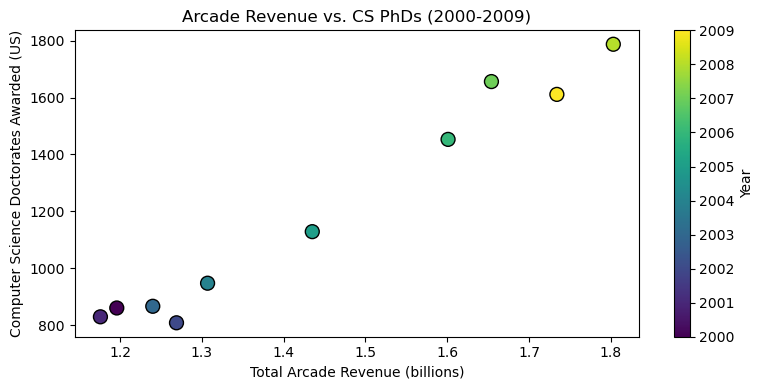

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:\\Users\\harin\\Downloads\\arcade-revenue-vs-cs-doctorates.csv' 
data = pd.read_csv(file_path)

years = data['Year']
arcade_revenue = data['Total Arcade Revenue (billions)']
cs_phds = data['Computer Science Doctorates Awarded (US)']

# Create the scatter plot
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    arcade_revenue, cs_phds, 
    c=years, cmap='viridis', edgecolor='k', s=100
)

# Add a colorbar to indicate the year
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Label the axes and add a title
plt.xlabel('Total Arcade Revenue (billions)', fontsize=10)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=10)
plt.title('Arcade Revenue vs. CS PhDs (2000-2009)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
